# Wersja sklearn

## 0 instalacja, update, wersja sklearn

In [ ]:
pip install -U scikit-learn # instalacja najnowszej wersji scikit-learn

In [ ]:
import sklearn

sklearn.__version__

'0.24.2'

In [ ]:
pip show scikit-learn # pokazanie wersji sklearn przez pip

Name: scikit-learn
Version: 0.24.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: threadpoolctl, numpy, joblib, scipy
Required-by: yellowbrick, sklearn, sklearn-pandas, mlxtend, lightgbm, librosa, imbalanced-learn


# Modele - wszystkie biblioteki

## Przygotowanie modelu

### 37 - ekstrakcja cech wielomianowych 2 stopnia

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
 
 
np.set_printoptions(suppress=True, precision=3)
df = pd.read_csv('data.csv')
 
poly = PolynomialFeatures(degree=2)
 
df_poly = poly.fit_transform(df)
print(df_poly)

### 38 - ekstrakcja cech wielomianowych 3 stopnia

In [ ]:
# data.csv jest na udemy

import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures


np.set_printoptions(suppress=True, precision=3, linewidth=150)

df = pd.read_csv('data.csv')

pf = PolynomialFeatures(degree = 3)

ndf = pf.fit_transform(df)

print(ndf)

## Regresja liniowa

### 34 scikit - równanie normalne, wyznaczenie równania prostej

In [ ]:
import numpy as np
import pandas as pd


df = pd.DataFrame({'years': [1, 2, 3, 4, 5, 6],
                   'salary': [4000, 4250, 4500, 4750, 5000, 5250]})
df

,years,salary
0,1,4000
1,2,4250
2,3,4500
3,4,4750
4,5,5000
5,6,5250


In [ ]:
X = np.array(df['years']).reshape(len(df['years']),1)
X

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [ ]:
Y = np.array(df['salary'])
Y

array([4000, 4250, 4500, 4750, 5000, 5250])

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X, Y)

print('Linear regression: {} + {}x'.format(round(lr.intercept_,2),round(lr.coef_[0],2)))

Linear regression: 3750.0 + 250.0x


### 35 implementacja - równanie normalne, rownanie prostej

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


df = pd.DataFrame({'years': [1, 2, 3, 4, 5, 6],
                   'salary': [4000, 4250, 4500, 4750, 5000, 5250]})

df

,years,salary
0,1,4000
1,2,4250
2,3,4500
3,4,4750
4,5,5000
5,6,5250


In [ ]:
X = np.array(df[['years']]).reshape(len(df['years']),1)
print(X)
bias = np.ones((len(X),1))
print(bias)
X = np.append(bias, X, axis = 1)
X

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.]])

In [ ]:
Y = np.array(df[['salary']])
Y

array([[4000],
       [4250],
       [4500],
       [4750],
       [5000],
       [5250]])

In [ ]:
L = np.linalg.inv(np.dot(X.T,X))
L

array([[ 0.86666667, -0.2       ],
       [-0.2       ,  0.05714286]])

In [ ]:
R = np.dot(X.T,Y)
R

array([[ 27750.],
       [101500.]])

In [ ]:
W = np.dot(L,R)
W

array([[3750.],
       [ 250.]])

In [ ]:
print( 'Linear regression: {} * {}x'.format(round(W[0][0],2),round(W[1][0],2)))

Linear regression: 3750.0 * 250.0x


### 36 score()

In [ ]:
# data.csv jest na udemy

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv('data.csv')

lr = LinearRegression()

X = np.array(df[['variable']])
Y = np.array(df[['target']])

lr.fit(X,Y)

print(round(lr.score(X,Y),4))

### 97 score()

In [98]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 150)
raw_data = load_boston()

df = pd.DataFrame(data=np.c_[raw_data.data, raw_data.target], columns=list(raw_data.feature_names) + ['target'])

data = df.copy()
target = data.pop('target')

data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=42)

lr = LinearRegression()

lr.fit(data_train, target_train)

print('R^2 score:',round(lr.score(data_test,target_test),4))

R^2 score: 0.6844


### 98 predict

In [100]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 150)
raw_data = load_boston()

df = pd.DataFrame(data=np.c_[raw_data.data, raw_data.target], columns=list(raw_data.feature_names) + ['target'])

data = df.copy()
target = data.pop('target')

data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=42)

lr = LinearRegression()

lr.fit(data_train, target_train)

target_pred = lr.predict(data_test)

print(target_pred)

[28.83885359 36.00783288 15.08324755 25.23090886 18.87864064 23.21398327
 17.5931124  14.30508093 23.05438985 20.62008346 24.78514683 18.66833668
 -6.9788951  21.83575737 19.20898992 26.2868054  20.54379176  5.65713224
 40.42358065 17.64146116 27.32258958 30.05056174 11.15013704 24.11530393
 17.89145648 15.79348591 22.94743453 14.2586068  22.26731194 19.24709013
 22.26897546 25.24344002 25.69165643 17.98759507 16.70286649 17.11631225
 31.19643534 20.17835831 23.71828436 24.79196868 13.94575895 32.00389982
 42.53869791 17.44523722 27.15354457 17.07482215 13.89272021 26.06440323
 20.36888769 29.97813037 21.35346608 34.32287916 15.88498671 26.17757739
 39.50970314 22.84123308 18.95049088 32.68913818 25.02057949 12.90539147
 22.76052302 30.53884316 31.60797905 15.92162168 20.50670563 16.50798147
 20.50202198 26.00723901 30.63860954 11.42877835 20.53765181 27.56249175
 10.85162601 15.96871769 23.87570192  5.66369672 21.47818991 41.2820034
 18.56559986  9.08857252 20.97848452 13.0630057  20.

### 99 actual, pred, error, abs_error

In [105]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 150)
raw_data = load_boston()

df = pd.DataFrame(data=np.c_[raw_data.data, raw_data.target], columns=list(raw_data.feature_names) + ['target'])

data = df.copy()
target = data.pop('target')

data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=42)

regressor = LinearRegression()
regressor.fit(data_train, target_train)

target_pred = regressor.predict(data_test)

df = pd.DataFrame(data = np.c_[target_test, target_pred], columns = ['target_test','target_pred'])
df['error'] = df['target_pred'] - df['target_test']
df['abs_error'] = abs(df['error'])
print(df)

     target_test  target_pred     error  abs_error
0           23.6    28.838854  5.238854   5.238854
1           32.4    36.007833  3.607833   3.607833
2           13.6    15.083248  1.483248   1.483248
3           22.8    25.230909  2.430909   2.430909
4           16.1    18.878641  2.778641   2.778641
..           ...          ...       ...        ...
122          8.8     3.284209 -5.515791   5.515791
123         19.2    23.798796  4.598796   4.598796
124         25.3    25.733299  0.433299   0.433299
125         20.4    23.048156  2.648156   2.648156
126         23.1    24.730468  1.630468   1.630468

[127 rows x 4 columns]


### 39 MAE - implementacja

In [ ]:
import numpy as np
import pandas as pd

pred = pd.read_csv('predictions.csv')

# from sklearn.metrics import mean_absolute_error()

def mean_absolute_error(y_true, y_pred):
    return abs(y_true-y_pred).sum() / len(y_true)

mae = mean_absolute_error(pred['y_true'], pred['y_pred'])

print('MAE = {}'.format(round(mae,4)))

### 40 MSE - implementacja

In [ ]:
import numpy as np
import pandas as pd

import numpy as np
import pandas as pd


pred = pd.read_csv('predictions.csv')


def mean_absolute_error(y_true, y_pred):
    return ((y_true-y_pred)**2).sum() / len(y_true)

mae = mean_absolute_error(pred['y_true'], pred['y_pred'])

print('MSE = {}'.format(round(mae,4)))

## Gradient Boosting Regressor

### 100 sci-kit

In [106]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor


pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 150)
raw_data = load_boston()

df = pd.DataFrame(data=np.c_[raw_data.data, raw_data.target], columns=list(raw_data.feature_names) + ['target'])

data = df.copy()
target = data.pop('target')

data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=42)

gbr = GradientBoostingRegressor(random_state = 42)

gbr.fit(data_train, target_train)

print('R^2 score:',round(gbr.score(data_test, target_test),4))

R^2 score: 0.8721


## Drzewa decyzyjne

### 44 Entropia - df.iterrows()

In [ ]:
import numpy as np
import pandas as pd


def entropy(x):
    return np.round(-np.sum(x * np.log2(x)), 4)


df = pd.DataFrame({'val_1': np.arange(0.01, 1.0, 0.1), 'val_2': 1 - np.arange(0.01, 1.0, 0.1)})
df

,val_1,val_2
0,0.01,0.99
1,0.11,0.89
2,0.21,0.79
3,0.31,0.69
4,0.41,0.59
5,0.51,0.49
6,0.61,0.39
7,0.71,0.29
8,0.81,0.19
9,0.91,0.09


In [ ]:
df['entropy'] =df[['val_1','val_2']].apply(entropy)
df

,val_1,val_2,entropy
0,0.01,0.99,NaN
1,0.11,0.89,NaN
2,0.21,0.79,NaN
3,0.31,0.69,NaN
4,0.41,0.59,NaN
5,0.51,0.49,NaN
6,0.61,0.39,NaN
7,0.71,0.29,NaN
8,0.81,0.19,NaN
9,0.91,0.09,NaN


In [ ]:
df['entropy'] = [entropy([row[1][0], row[1][1]]) for row in df.iterrows()]
print(df)

   val_1  val_2  entropy
0   0.01   0.99   0.0808
1   0.11   0.89   0.4999
2   0.21   0.79   0.7415
3   0.31   0.69   0.8932
4   0.41   0.59   0.9765
5   0.51   0.49   0.9997
6   0.61   0.39   0.9648
7   0.71   0.29   0.8687
8   0.81   0.19   0.7015
9   0.91   0.09   0.4365


### 47 sci-kit - model

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


np.random.seed(42)
raw_data = make_moons(n_samples=2000, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

X_train, X_test, y_train, y_test = train_test_split(data, target)

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test)

print('Accuracy:',round(acc,4))

Accuracy: 0.902


### 48 sci-kit - model + max_depth

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


np.random.seed(42)
raw_data = make_moons(n_samples=2000, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

X_train, X_test, y_train, y_test = train_test_split(data, target)

dtc = DecisionTreeClassifier(max_depth=6)

dtc.fit(X_train, y_train)

dtc.score(X_test, y_test)

0.928

### 49 sci-kit - model + min_samples_leaf

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


np.random.seed(42)
raw_data = make_moons(n_samples=2000, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

X_train, X_test, y_train, y_test = train_test_split(data, target)

dtc = DecisionTreeClassifier(max_depth= 6, min_samples_leaf=6)

dtc.fit(X_train, y_train)

dtc.score(X_test, y_test)

0.93

## Lasy losowe

### 51 sci-kit - accuracy

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

np.random.seed(42)
raw_data = make_moons(n_samples=2000, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

X_train, X_test, y_train, y_test = train_test_split(data, target)

rfc = RandomForestClassifier(random_state = 42)

rfc.fit(X_train, y_train)

predictions = rfc.predict(X_test)

acc = accuracy_score(y_test, predictions)

print('Accuracy: {}'.format(acc))

Accuracy: 0.93


### 52 sci-kit - GridSearch()

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


np.random.seed(42)
raw_data = make_moons(n_samples=2000, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

X_train, X_test, y_train, y_test = train_test_split(data, target)

rfc = RandomForestClassifier()

params = {'criterion':['gini','entropy'],
          'max_depth':[6,7,8],
          'min_samples_leaf':[4,5]}

grid_search = GridSearchCV(rfc, param_grid = params, scoring = 'accuracy', cv = 5)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4}


## K-means

### 58 implementacja

data.csv jest na udemy ale jest dobrze zaimplementowane

In [ ]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
import random


np.random.seed(42)

df = pd.read_csv('data.csv')

x1_min = df.x1.min()
x1_max = df.x1.max()

x2_min = df.x2.min()
x2_max = df.x2.max()

centroid_1 = np.array([random.uniform(x1_min, x1_max), random.uniform(x2_min, x2_max)])
centroid_2 = np.array([random.uniform(x1_min, x1_max), random.uniform(x2_min, x2_max)])

data = df.values

for i in range(10):
    clusters = []
    for point in data:
        centroid_1_dist = norm(centroid_1 - point)
        centroid_2_dist = norm(centroid_2 - point)
        cluster = 1
        if centroid_1_dist > centroid_2_dist:
            cluster = 2
        clusters.append(cluster)

    df['cluster'] = clusters

    centroid_1 = [df[df.cluster == 1].x1.mean(), df[df.cluster == 1].x2.mean()]
    centroid_2 = [df[df.cluster == 2].x1.mean(), df[df.cluster == 2].x2.mean()]
    
print(centroid_1)
print(centroid_2)
    

### 59 sci-kit + centroid_centers_

clusters.csv jest w udemy ale jest wlasciwie rozwiazane

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans


np.random.seed(42)

df = pd.read_csv('clusters.csv')
kmeans = KMeans(n_clusters = 3, max_iter = 1000, random_state = 42)

kmeans.fit(df)

print(kmeans.cluster_centers_)

### 60 sci-kit + predict

clusters.csv jest w udemy

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans


np.random.seed(42)
df = pd.read_csv('clusters.csv')

kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=42)
kmeans.fit(df)

y_kmeans = kmeans.predict(df.values)

df['y_kmeans'] = y_kmeans

print(df[:10])

### 61 sci-kit + wccs + inertia_

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans


np.random.seed(42)

df = pd.read_csv('clusters.csv')

wccs = []

for i in range(2,10):
    km = KMeans(random_state = 42, n_clusters = i)
    km.fit(df)
    wccs.append(round(km.inertia_,2))

print(wccs)
    

## Grupowanie hierarchiczne / Agglomerative clustering

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

culsters.csv jest w udemy

### 63 sci-kit

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

df = pd.read_csv('clusters.csv')

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2)
col = cluster.fit_predict(df.values)

df['cluster'] = col

print(df[:10])

### 64 sci-kit + metryka manhattan

zwróć uwagę że musisz zmienic też linkage, przy domyslnym 'ward' mangattan nie zadziała

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering


df = pd.read_csv('clusters.csv')

cluster = AgglomerativeClustering(n_clusters=2, affinity = 'manhattan', linkage = 'single')
col = cluster.fit_predict(df.values)

df['cluster'] = col

print(df[:10])

## DBSCAN

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

### 65 sci-kit

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN

df = pd.read_csv('clusters.csv')

db = DBSCAN(eps = 0.6, min_samples = 7)

col = db.fit_predict(df.values) # uzywasz fit_predict anie fit_transformr

df['cluster'] = col

print(df[:10])

### 66 sci-kit + czestosc przypisania kazdego z klastrów

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN

df = pd.read_csv('clusters.csv')

db = DBSCAN(eps = 0.6, min_samples = 7)

col = db.fit_predict(df.values)

df['cluster'] = col

print(df['cluster'].value_counts())

## PCA

### 68 sci-kit standaryzacja

In [ ]:
# standaryzacja
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

df = pd.read_csv('pca.csv')

ss = StandardScaler()

X = df[['var1','var2','var3']]
y = df[['class']]

X_std = ss.fit_transform(X)

print(X_std[:10])

### 69 implementacja

In [ ]:
# standaryzacja
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

df = pd.read_csv('pca.csv')

ss = StandardScaler()

X = df[['var1','var2','var3']]
y = df[['class']]

X_std = ss.fit_transform(X)

# Implementacja PCA

# macierz kowariancji
cov_mat = np.cov(X_std, rowvar=False)

# wektory własne i odpowiadające nim wartości własne macierzy kowariancji
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# posortowanie wektorów według wartości własnych
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
eig_pairs.sort(reverse=True)

# obliczenie wartości procentowej wyjaśnionej wariancji
total = sum(eig_vals)
explained_variance_ratio = [(i / total) for i in sorted(eig_vals, reverse=True)]

cumulative_explained_variance = np.cumsum(explained_variance_ratio)

results = pd.DataFrame(data={'explained_variance_ratio': explained_variance_ratio})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1

W = np.hstack((eig_pairs[0][1].reshape(3, 1), eig_pairs[1][1].reshape(3, 1)))

# przemnożenie X_Std przez W

X_pca = X_std.dot(W)

print(X_pca[:10])

### 70 implementacja 2

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


np.set_printoptions(precision=8, suppress=True, edgeitems=5, linewidth=200)
np.random.seed(42)
df = pd.read_csv('pca.csv')

X = df.copy()
y = X.pop('class')

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

eig_vals, eig_vecs = np.linalg.eig(np.cov(X_std, rowvar=False))
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
eig_pairs.sort(reverse=True)

W = np.hstack((eig_pairs[0][1].reshape(3, 1), eig_pairs[1][1].reshape(3, 1)))
X_pca = X_std.dot(W)

pca = pd.DataFrame(X_pca, columns = ['pca_1','pca_2'])

pca['class'] = df['class']

pca['pca_2'] = - pca['pca_2']

print(pca[:10])

### 71 sci_kit (standaryzacja + pca)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


np.set_printoptions(precision=8, suppress=True, edgeitems=5, linewidth=200)
np.random.seed(42)
df = pd.read_csv('pca.csv')

X = df.copy()
y = X.pop('class')

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components = 2)

X_pca = pca.fit_transform(X_std)

df_pca = pd.DataFrame(X_pca, columns = ['pca_1','pca_2'])

df_pca['class'] = df['class']

print(df_pca[:10])

### 72 sci_kit + liczba komponentów wyjasniających wariance

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('pca.csv')
data = df.values

ss = StandardScaler()
data_std = ss.fit_transform(data)

pca = PCA(n_components = 0.95)
pca_df = pca.fit_transform(data_std)

print('Liczba komponentów:',pca.n_components_)

## Local Outlier Factor - LOF

### 79 sci-kit

blobs.csv jest w udemy

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)

df = pd.read_csv('blobs.csv')

clf = LocalOutlierFactor(n_neighbors = 20)

lof = clf.fit_predict(df.values)

df['lof'] = lof

print(df[:10])

### 80 rozkład outlierów i inlierów

blobs.csv jest w udemy

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor


np.random.seed(42)
df = pd.read_csv('blobs.csv')
data = df.values

lof = LocalOutlierFactor(n_neighbors=30)
y_pred = lof.fit_predict(data)

df['lof'] = y_pred

print(df['lof'].value_counts())

## Isolation Forest

### 81 sci-kit

factory.csv jest na udemy

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

np.random.seed(42)

df = pd.read_csv('factory.csv')

clf = IsolationForest(n_estimators = 100, contamination = 0.05, random_state = 42)

outlier_flag = clf.fit_predict(df.values)

df['outlier_flag'] = outlier_flag

print(df[:10])

### 82 rozkład outlierów i inlierów

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest


np.random.seed(42)
df = pd.read_csv('factory.csv')

outlier = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
outlier.fit(df)
df['outlier_flag'] = outlier.predict(df)

print(df['outlier_flag'].value_counts())

# Zastosowania ML

## NLP

### 53 CountVectorizer()

Posłuży do zliczania słów w danym tekście

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer


documents = [
    'python is a programming language',
    'python is popular',
    'programming in python',
    'object-oriented programming in python'
]

documents

['python is a programming language',
 'python is popular',
 'programming in python',
 'object-oriented programming in python']

In [ ]:
cv = CountVectorizer()
x = cv.fit_transform(documents) # dopasowanie i przeksztalcenie
x.toarray() # wyswietlenie wyniku w postaci tabeli

array([[0, 1, 1, 0, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 1, 1],
       [1, 0, 0, 1, 1, 0, 1, 1]])

In [ ]:
cv.get_feature_names() # wyswitl wszystkie unikatowe słowa

['in',
 'is',
 'language',
 'object',
 'oriented',
 'popular',
 'programming',
 'python']

In [ ]:
df = pd.DataFrame(x.toarray(), columns = cv.get_feature_names())
print(df)

   in  is  language  object  oriented  popular  programming  python
0   0   1         1       0         0        0            1       1
1   0   1         0       0         0        1            0       1
2   1   0         0       0         0        0            1       1
3   1   0         0       1         1        0            1       1


### 54 CountVectorizer() stop_words

In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer


documents = [
    'python is a programming language',
    'python is popular',
    'programming in python',
    'object-oriented programming in python'
]

cv = CountVectorizer(stop_words='english') # english to lista słów które mogą być uznane, jak ustawimy stop_words na english wtedy pomijane beda słowa jak in, him, or itp.

x = cv.fit_transform(documents)

x.toarray()

array([[1, 0, 0, 0, 1, 1],
       [0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 1],
       [0, 1, 1, 0, 1, 1]])

In [ ]:
cv.get_feature_names()

['language', 'object', 'oriented', 'popular', 'programming', 'python']

In [ ]:
df = pd.DataFrame(x.toarray(), columns = cv.get_feature_names())
print(df)

   language  object  oriented  popular  programming  python
0         1       0         0        0            1       1
1         0       0         0        1            0       1
2         0       0         0        0            1       1
3         0       1         1        0            1       1


### 55 CountVectorizer() n_grams

n_grams to tuple który mowi jakie n_gramy chcemy pokazac

(1,1) - unigramy
(1,2) - unigramy i bigramy
(2,2) - bigramy

In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer


pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 20)
documents = [
    'python is a programming language',
    'python is popular',
    'programming in python',
    'object-oriented programming in python',
    'programming language'
]

cv = CountVectorizer(stop_words = 'english', ngram_range=(1,2))

x = cv.fit_transform(documents)

x.toarray()

array([[1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]])

In [ ]:
cv.get_feature_names()

['language',
 'object',
 'object oriented',
 'oriented',
 'oriented programming',
 'popular',
 'programming',
 'programming language',
 'programming python',
 'python',
 'python popular',
 'python programming']

In [ ]:
df = pd.DataFrame(x.toarray(), columns = cv.get_feature_names())
print(df)

   language  object  object oriented  oriented  oriented programming  popular  programming  programming language  programming python  python  python popular  python programming
0         1       0                0         0                     0        0            1                     1                   0       1               0                   1
1         0       0                0         0                     0        1            0                     0                   0       1               1                   0
2         0       0                0         0                     0        0            1                     0                   1       1               0                   0
3         0       1                1         1                     1        0            1                     0                   1       1               0                   0
4         1       0                0         0                     0        0            1                     1   

### 56 TfidfVectorizer()

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer


pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 10)
pd.set_option('precision', 3)
documents = [
    'python is a programming language',
    'python is popular',
    'programming in python',
    'object-oriented programming in python',
    'programming language'
]

tfidf = TfidfVectorizer()

x = tfidf.fit_transform(documents)

x.toarray()

array([[0.        , 0.57974759, 0.57974759, 0.        , 0.        ,
        0.        , 0.40483667, 0.40483667],
       [0.        , 0.57506256, 0.        , 0.        , 0.        ,
        0.71277522, 0.        , 0.40156512],
       [0.71152472, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.4968564 , 0.4968564 ],
       [0.44508965, 0.        , 0.        , 0.55167715, 0.55167715,
        0.        , 0.31080528, 0.31080528],
       [0.        , 0.        , 0.8198869 , 0.        , 0.        ,
        0.        , 0.57252551, 0.        ]])

In [ ]:
tfidf.get_feature_names()

['in',
 'is',
 'language',
 'object',
 'oriented',
 'popular',
 'programming',
 'python']

In [ ]:
df = pd.DataFrame(x.toarray(), columns = tfidf.get_feature_names())
print(df)

      in     is  language  object  oriented  popular  programming  python
0  0.000  0.580      0.58   0.000     0.000    0.000        0.405   0.405
1  0.000  0.575      0.00   0.000     0.000    0.713        0.000   0.402
2  0.712  0.000      0.00   0.000     0.000    0.000        0.497   0.497
3  0.445  0.000      0.00   0.552     0.552    0.000        0.311   0.311
4  0.000  0.000      0.82   0.000     0.000    0.000        0.573   0.000


### 57 TfidfVectorizer() - stopwords()

In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer


pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 10)
pd.set_option('precision', 3)
documents = [
    'python is a programming language',
    'python is popular',
    'programming in python',
    'object-oriented programming in python',
    'programming language'
]

tf = TfidfVectorizer(stop_words = ['is', 'in'])

x = tf.fit_transform(documents)
x.toarray()

array([[0.71152472, 0.        , 0.        , 0.        , 0.4968564 ,
        0.4968564 ],
       [0.        , 0.        , 0.        , 0.87124678, 0.        ,
        0.49084524],
       [0.        , 0.        , 0.        , 0.        , 0.70710678,
        0.70710678],
       [0.        , 0.61606451, 0.61606451, 0.        , 0.34708   ,
        0.34708   ],
       [0.8198869 , 0.        , 0.        , 0.        , 0.57252551,
        0.        ]])

In [ ]:
tf.get_feature_names()

['language', 'object', 'oriented', 'popular', 'programming', 'python']

In [ ]:
df = pd.DataFrame(x.toarray(), columns = tf.get_feature_names())
print(df)

   language  object  oriented  popular  programming  python
0     0.712   0.000     0.000    0.000        0.497   0.497
1     0.000   0.000     0.000    0.871        0.000   0.491
2     0.000   0.000     0.000    0.000        0.707   0.707
3     0.000   0.616     0.616    0.000        0.347   0.347
4     0.820   0.000     0.000    0.000        0.573   0.000


### 87 wyświel tekst

In [4]:
import numpy as np
import pandas as pd

data_train = pd.read_excel('data_train.xlsx')
target_train = pd.read_excel('target_train.xlsx')

print(data_train['text'][1])

From: stephens@geod.emr.ca (Dave Stephenson)
Subject: Re: Clementine Science Team Selected
Nntp-Posting-Host: ngis.geod.emr.ca
Organization: Dept. of Energy, Mines, and Resources, Ottawa
Lines: 32

nickh@CS.CMU.EDU (Nick Haines) writes:

>In article <stephens.734792933@ngis> stephens@geod.emr.ca (Dave Stephenson) writes:

>   Remember the first government scientist in the British Empire was
>   the Astronomer Royal, who was paid [...] from the Department
>   of Ordinance Budget (i.e. the military). Flamsteed House (the original
>   RGO) was built out of Army Surplus Scrap ( A gate house at the Tower of
>   London ?), and paid for by the sale of time expired gunpowder [...]

>At the time, astronomy was vital to the military, in that navigation
>and cartography were of primary impoortance to the military, and good
>cartography was impossible without good astronomy.

>The relevance these daysis somewhat less obvious.

>Nick

It still applies, except the astronomy these days is Very Long B

### 89 CountVectorizer()

In [15]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer

data_train = pd.read_excel('data_train.xlsx')
target_train = pd.read_excel('target_train.xlsx')

data_train = data_train['text'].tolist()
target_train = target_train.values.ravel()

cv = CountVectorizer()

data_train_vectorized = cv.fit_transform(data_train)

data_train_vectorized.shape

(50, 3225)

### 90 CountVectorizer() + MultinomialNaiveBaias

In [29]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


data_train = pd.read_excel('data_train.xlsx')
target_train = pd.read_excel('target_train.xlsx')

categories = ['comp.graphics', 'sci.space']

# zmiana na listę danych tekstowych w df

data_train = data_train['text'].tolist()
target_train = target_train.values.ravel()

# wektoryzacja

vectorizer = CountVectorizer()
data_train_vectorized = vectorizer.fit_transform(data_train)

# trening

mnb = MultinomialNB()
mnb.fit(data_train_vectorized, target_train)

# wektoryzujemy dane testowe. UWAGA tylko transform bo fit był na danych treningowych

docs = ['The graphic designer requires a good precessor to work.', 'Flights into space']
docs_vectorized = vectorizer.transform(docs)

# predict na testowych i zwektoryzowanych danych

data_pred = mnb.predict(docs_vectorized)

# wyswietlenie wyników

for doc, category in zip(docs, data_pred):
  print("'{}' => {}".format(doc, categories[category]))

'The graphic designer requires a good precessor to work.' => comp.graphics
'Flights into space' => sci.space


### 91 TfidfVectorizer()

In [33]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer


data_train = pd.read_excel('data_train.xlsx')
target_train = pd.read_excel('target_train.xlsx')

categories = ['comp.graphics', 'sci.space']

data_train = data_train['text'].tolist()
target_train = target_train.values.ravel()

tfidf = TfidfVectorizer()
data_train_vectorized = tfidf.fit_transform(data_train, target_train)

data_train_vectorized.shape

(50, 3225)

# Pandas

## 1 isna - procent brakujących danych

In [ ]:
import numpy as np
import pandas as pd


data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df = pd.DataFrame(data)

print(round(df.isna().sum() / df.shape[0],2))

size      0.17
color     0.00
gender    0.17
price     0.17
weight    0.33
bought    0.00
dtype: float64


## 6 dropna - usun wiersze z nan

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html?highlight=dropna

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer


data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df = pd.DataFrame(data=data)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [ ]:
df.dropna(axis = 0, how = 'any', inplace = True, subset = ['weight'])
print(df[['price','weight']].mean())

price     122.333333
weight    415.000000
dtype: float64


## 7 select_dtype i fillna - wybierz kolumny z danym typem danych i zastap nan

* select_dtype - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.
* fillna - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer


data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df = pd.DataFrame(data=data)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [ ]:
df_object = df.select_dtypes(include = ['object']).fillna(value = 'empty')
print(df_object)

    size  color  gender bought
0     XL    red  female    yes
1      L  green    male     no
2      M   blue   empty    yes
3  empty  green  female     no
4      M    red  female    yes
5      M  green    male     no


## 8 cut - dyskretyzacja, automatyczne przedziały

pd.cut - https://www.geeksforgeeks.org/pandas-cut-method-in-python/#:~:text=Pandas%20cut%20%28%29%20function%20is%20used%20to%20separate,%28x%2C%20bins%2C%20right%3DTrue%2C%20labels%3DNone%2C%20retbins%3DFalse%2C%20precision%3D3%2C%20include_lowest%3DFalse%2C%20duplicates%3D%E2%80%9Draise%E2%80%9D%2C%29

In [ ]:
import pandas as pd


df = pd.DataFrame(data={'weight': [75., 78.5, 85., 91., 84.5, 83., 68.]})
df 

,weight
0,75.0
1,78.5
2,85.0
3,91.0
4,84.5
5,83.0
6,68.0


In [ ]:
df['weight_cut'] = pd.cut(df['weight'], bins = 3)
df

,weight,weight_cut
0,75.0,"(67.977, 75.667]"
1,78.5,"(75.667, 83.333]"
2,85.0,"(83.333, 91.0]"
3,91.0,"(83.333, 91.0]"
4,84.5,"(83.333, 91.0]"
5,83.0,"(75.667, 83.333]"
6,68.0,"(67.977, 75.667]"


## 9 cut - dyskretyzacja, określone przedziały

In [ ]:
import pandas as pd


df = pd.DataFrame(data={'weight': [75., 78.5, 85., 91., 84.5, 83., 68.]})
df

,weight
0,75.0
1,78.5
2,85.0
3,91.0
4,84.5
5,83.0
6,68.0


In [ ]:
df['weight_cut'] = pd.cut(df['weight'], right = True, bins = [60,75,80,95])
print(df)

   weight weight_cut
0    75.0   (60, 75]
1    78.5   (75, 80]
2    85.0   (80, 95]
3    91.0   (80, 95]
4    84.5   (80, 95]
5    83.0   (80, 95]
6    68.0   (60, 75]


## 10 cut - dyskretyzacja, etykiety przedziałów

In [ ]:
import pandas as pd


df = pd.DataFrame(data={'weight': [75., 78.5, 85., 91., 84.5, 83., 68.]})
df

,weight
0,75.0
1,78.5
2,85.0
3,91.0
4,84.5
5,83.0
6,68.0


In [ ]:
df['weight_cut'] = pd.cut(df['weight'], right = True, bins = [60,75,80,95], labels = ['light', 'normal', 'heavy'])
print(df)

   weight weight_cut
0    75.0      light
1    78.5     normal
2    85.0      heavy
3    91.0      heavy
4    84.5      heavy
5    83.0      heavy
6    68.0      light


## 11 get_dummies

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [ ]:
import pandas as pd


df = pd.DataFrame(data={'weight': [75., 78.5, 85., 91., 84.5, 83., 68.]})
df['weight_cut'] = pd.cut(df['weight'], bins=(60, 75, 80, 95), labels=['light', 'normal', 'heavy'])
df

,weight,weight_cut
0,75.0,light
1,78.5,normal
2,85.0,heavy
3,91.0,heavy
4,84.5,heavy
5,83.0,heavy
6,68.0,light


In [ ]:
df = pd.get_dummies(df)
print(df)

   weight  weight_cut_light  weight_cut_normal  weight_cut_heavy
0    75.0                 1                  0                 0
1    78.5                 0                  1                 0
2    85.0                 0                  0                 1
3    91.0                 0                  0                 1
4    84.5                 0                  0                 1
5    83.0                 0                  0                 1
6    68.0                 1                  0                 0


## 12 apply

In [ ]:
import pandas as pd


data_dict = {
    'currency': [['PLN', 'USD'], ['EUR', 'USD', 'PLN', 'CAD'], ['GBP'], ['JPY', 'CZK', 'HUF'], []]
}
df = pd.DataFrame(data=data_dict)
df

,currency
0,"[PLN, USD]"
1,"[EUR, USD, PLN, CAD]"
2,[GBP]
3,"[JPY, CZK, HUF]"
4,[]


In [ ]:
df['number'] = df['currency'].apply(lambda x: len(x))
print(df)

               currency  number
0            [PLN, USD]       2
1  [EUR, USD, PLN, CAD]       4
2                 [GBP]       1
3       [JPY, CZK, HUF]       3
4                    []       0


## 13 apply

In [ ]:
import pandas as pd


data_dict = {
    'currency': [['PLN', 'USD'], ['EUR', 'USD', 'PLN', 'CAD'], ['GBP'], ['JPY', 'CZK', 'HUF'], []]
}
df = pd.DataFrame(data=data_dict)
df

,currency
0,"[PLN, USD]"
1,"[EUR, USD, PLN, CAD]"
2,[GBP]
3,"[JPY, CZK, HUF]"
4,[]


In [ ]:
df['PLN_flag'] = df['currency'].apply(lambda x: 1 if 'PLN' in x else 0)
print(df)

               currency  PLN_flag
0            [PLN, USD]         1
1  [EUR, USD, PLN, CAD]         1
2                 [GBP]         0
3       [JPY, CZK, HUF]         0
4                    []         0


## 14 str.split - split wartosci kolumny na pojedyncze kolumny

In [ ]:
import pandas as pd


df = pd.DataFrame(data={'hashtags': ['#good#vibes', '#hot#summer#holiday', '#street#food', '#workout']})
df

,hashtags
0,#good#vibes
1,#hot#summer#holiday
2,#street#food
3,#workout


In [ ]:
df = df['hashtags'].str.split('#', expand=True)
df = df.drop(columns = [0])
df.columns = ['hashtag1','hashtag2', 'hashtag3']
print(df)

  hashtag1 hashtag2 hashtag3
0     good    vibes     None
1      hot   summer  holiday
2   street     food     None
3  workout     None     None


## 73 str.split - split wartości kolumny na pojedyncze kolumny

In [ ]:
import numpy as np
import pandas as pd


data = {'products': ['bread eggs', 'bread eggs milk', 'milk cheese', 
                     'bread butter cheese', 'eggs milk', 
                     'bread milk butter cheese']}

transactions = pd.DataFrame(data=data, index=range(1, 7))

transactions

,products
1,bread eggs
2,bread eggs milk
3,milk cheese
4,bread butter cheese
5,eggs milk
6,bread milk butter cheese


In [ ]:
expanded = transactions['products'].str.split(expand = True)
print(expanded)

,0,1,2,3
1,bread,eggs,None,None
2,bread,eggs,milk,None
3,milk,cheese,None,None
4,bread,butter,cheese,None
5,eggs,milk,None,None
6,bread,milk,butter,cheese


## 74 unikalne wartosci z całego df

In [ ]:
import numpy as np
import pandas as pd


data = {'products': ['bread eggs', 'bread eggs milk', 'milk cheese', 
                     'bread butter cheese', 'eggs milk', 
                     'bread milk butter cheese']}

transactions = pd.DataFrame(data=data, index=range(1, 7))
expanded = transactions['products'].str.split(expand=True

In [ ]:
expanded[2].unique().tolist()

[None, 'milk', 'cheese', 'butter']

In [ ]:
products = []

for i in range(4):
  temp = []
  temp = expanded[i].unique().tolist()
  for j in range(len(temp)):
    if temp[j] in products or temp[j] == None:
      pass
    else:
      products.append(temp[j])

print(sorted(products))

['bread', 'butter', 'cheese', 'eggs', 'milk']


## 75 encoded 0 i 1 z unikalnymi wartosciami

In [ ]:
import numpy as np
import pandas as pd


data = {'products': ['bread eggs', 'bread eggs milk', 'milk cheese', 
                     'bread butter cheese', 'eggs milk', 
                     'bread milk butter cheese']}

transactions = pd.DataFrame(data=data, index=range(1, 7))
expanded = transactions['products'].str.split(expand=True)

products = []
for col in expanded.columns:
    for product in expanded[col].unique():
        if product is not None and product not in products:
            products.append(product)

products.sort()

expanded

,0,1,2,3
1,bread,eggs,None,None
2,bread,eggs,milk,None
3,milk,cheese,None,None
4,bread,butter,cheese,None
5,eggs,milk,None,None
6,bread,milk,butter,cheese


In [ ]:
products

['bread', 'butter', 'cheese', 'eggs', 'milk']

In [ ]:
transactions_encoded_df = pd.DataFrame(0, columns = products, index = range(1,7))
transactions_encoded_df

,bread,butter,cheese,eggs,milk
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
6,0,0,0,0,0


In [ ]:
for i in range(4):
  for j in range(1,len(expanded)+1):
    for k in products:
      if expanded[i][j] == k:
        transactions_encoded_df[k][j] = 1
      else:
        pass

transactions_encoded_df = transactions_encoded_df.reset_index(drop=True)

print(transactions_encoded_df)

   bread  butter  cheese  eggs  milk
0      1       0       0     1     0
1      1       0       0     1     1
2      0       0       1     0     1
3      1       1       1     0     0
4      0       0       0     1     1
5      1       1       1     0     1


In [ ]:
total = len(transactions_encoded_df)
support = transactions_encoded_df.sum()

In [ ]:
support

bread     4
butter    2
cheese    3
eggs      3
milk      4
dtype: int64

In [ ]:
total

6

In [ ]:
transactions_encoded_df

,bread,butter,cheese,eggs,milk
1,1,0,0,1,0
2,1,0,0,1,1
3,0,0,1,0,1
4,1,1,1,0,0
5,0,0,0,1,1
6,1,1,1,0,1


In [ ]:
transactions_encoded_df['bread'][3]

0

## 77 wsparcie

In [ ]:
but_br = 0
but_mi = 0
for i in range(len(transactions_encoded_df)):
  if transactions_encoded_df['bread'][i] == 1 and transactions_encoded_df['butter'][i] == 1:
    but_br += 1
  if transactions_encoded_df['butter'][i] == 1 and transactions_encoded_df['milk'][i] == 1:
    but_mi += 1

In [ ]:
print('support(butter, bread) =',round(but_br/total,4))
print('support(butter, milk) =',round(but_mi/total,4))

support(butter, bread) = 0.3333
support(butter, milk) = 0.1667


## 78 pewność

In [ ]:
ch_br = 0
but_ch = 0
for i in range(len(transactions_encoded_df)):
  if transactions_encoded_df['cheese'][i] == 1 and transactions_encoded_df['bread'][i] == 1:
    ch_br += 1
  if transactions_encoded_df['butter'][i] == 1 and transactions_encoded_df['cheese'][i] == 1:
    but_ch += 1

In [ ]:
print('conf(cheese, bread) =',round(ch_br/transactions_encoded_df['cheese'].sum(),4))
print('conf(butter, cheese) =',round(but_ch/transactions_encoded_df['butter'].sum(),4))

conf(cheese, bread) = 0.6667
conf(butter, cheese) = 1.0


## 15 isnull - policz nan w wierszu

In [ ]:
import pandas as pd


df = pd.DataFrame(data={'hashtags': ['#good#vibes', '#hot#summer#holiday', '#street#food', '#workout']})
df = df['hashtags'].str.split('#', expand=True)
df = df.drop(columns=[0])
df.columns = ['hashtag1', 'hashtag2', 'hashtag3']
df

,hashtag1,hashtag2,hashtag3
0,good,vibes,None
1,hot,summer,holiday
2,street,food,None
3,workout,None,None


In [ ]:
df['missing'] = df.isnull().sum(axis = 1)
print(df)

  hashtag1 hashtag2 hashtag3  missing
0     good    vibes     None        2
1      hot   summer  holiday        1
2   street     food     None        2
3  workout     None     None        3


## 16 ''.join(x) - 100.000.000 na int

In [ ]:
import pandas as pd

df = pd.DataFrame(data={'investments': ['100_000_000', '100_000', '30_000_000', '100_500_000']})
df

,investments
0,100_000_000
1,100_000
2,30_000_000
3,100_500_000


In [ ]:
df['investments'] = df['investments'].str.split('_')
df['investments'] =df['investments'].apply(lambda x: int(''.join(x)))
print(df)

,investments
0,100000000
1,100000
2,30000000
3,100500000


## 88 df to list

In [9]:
import numpy as np
import pandas as pd

data_train = pd.read_excel('data_train.xlsx')
target_train = pd.read_excel('target_train.xlsx')

data_train = data_train.values.tolist()
len(data_train)

50

## 93 load_boston() - przygotowanie df

In [70]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

raw_data = load_boston()
data = raw_data['data']
target = raw_data['target']

df = pd.DataFrame(data = np.c_[data, target], columns = list(raw_data.feature_names) + ['target'] )
print(df.head(5))

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  target
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98    24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14    21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03    34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94    33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33    36.2

[5 rows x 14 columns]


## 94 corr()

In [82]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

raw_data = load_boston()
data = raw_data['data']
target = raw_data['target']

df = pd.DataFrame(data = np.c_[data, target], columns = list(raw_data.feature_names) + ['target'])

df.corr()['target'].sort_values(ascending = False)[1:]

RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: target, dtype: float64

## 95 

In [89]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston


pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 150)
raw_data = load_boston()

df = pd.DataFrame(data=np.c_[raw_data.data, raw_data.target], columns=list(raw_data.feature_names) + ['target'])

data = df.iloc[:,:-1]
target = df.iloc[:,-1]

print(data[:5])
print('\n')
print(target[:5])


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0     18.7  396.90   5.33


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64


In [93]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 150)
raw_data = load_boston()

df = pd.DataFrame(data=np.c_[raw_data.data, raw_data.target], columns=list(raw_data.feature_names) + ['target'])

data = df.copy()
target = data.pop('target')

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state = 42)

print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (379, 13)
X_test shape: (127, 13)
y_train shape: (379,)
y_test shape: (127,)


# Numpy

### 28 

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer


np.set_printoptions(precision=2, suppress=True, linewidth=100)
raw_data = load_breast_cancer()

raw_data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [ ]:
data = raw_data.data
data

array([[ 17.99,  10.38, 122.8 , ...,   0.27,   0.46,   0.12],
       [ 20.57,  17.77, 132.9 , ...,   0.19,   0.28,   0.09],
       [ 19.69,  21.25, 130.  , ...,   0.24,   0.36,   0.09],
       ...,
       [ 16.6 ,  28.08, 108.3 , ...,   0.14,   0.22,   0.08],
       [ 20.6 ,  29.33, 140.1 , ...,   0.27,   0.41,   0.12],
       [  7.76,  24.54,  47.92, ...,   0.  ,   0.29,   0.07]])

In [ ]:
target = raw_data.target
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,


In [ ]:
print(data[:3])

[[  17.99   10.38  122.8  1001.      0.12    0.28    0.3     0.15    0.24    0.08    1.09    0.91
     8.59  153.4     0.01    0.05    0.05    0.02    0.03    0.01   25.38   17.33  184.6  2019.
     0.16    0.67    0.71    0.27    0.46    0.12]
 [  20.57   17.77  132.9  1326.      0.08    0.08    0.09    0.07    0.18    0.06    0.54    0.73
     3.4    74.08    0.01    0.01    0.02    0.01    0.01    0.     24.99   23.41  158.8  1956.
     0.12    0.19    0.24    0.19    0.28    0.09]
 [  19.69   21.25  130.   1203.      0.11    0.16    0.2     0.13    0.21    0.06    0.75    0.79
     4.58   94.03    0.01    0.04    0.04    0.02    0.02    0.     23.57   25.53  152.5  1709.
     0.14    0.42    0.45    0.24    0.36    0.09]]


### 29 c_ - concatenation along second axis

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer


np.set_printoptions(precision=2, suppress=True, linewidth=100) # ustawienia domyślne w wyswietlaniu liczb
raw_data = load_breast_cancer()

data = raw_data['data']
target = raw_data['target']

data

array([[ 17.99,  10.38, 122.8 , ...,   0.27,   0.46,   0.12],
       [ 20.57,  17.77, 132.9 , ...,   0.19,   0.28,   0.09],
       [ 19.69,  21.25, 130.  , ...,   0.24,   0.36,   0.09],
       ...,
       [ 16.6 ,  28.08, 108.3 , ...,   0.14,   0.22,   0.08],
       [ 20.6 ,  29.33, 140.1 , ...,   0.27,   0.41,   0.12],
       [  7.76,  24.54,  47.92, ...,   0.  ,   0.29,   0.07]])

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,


In [ ]:
all_data = np.c_[data, target]
all_data = all_data[:3]
print(all_data)

[[  17.99   10.38  122.8  1001.      0.12    0.28    0.3     0.15    0.24    0.08    1.09    0.91
     8.59  153.4     0.01    0.05    0.05    0.02    0.03    0.01   25.38   17.33  184.6  2019.
     0.16    0.67    0.71    0.27    0.46    0.12    0.  ]
 [  20.57   17.77  132.9  1326.      0.08    0.08    0.09    0.07    0.18    0.06    0.54    0.73
     3.4    74.08    0.01    0.01    0.02    0.01    0.01    0.     24.99   23.41  158.8  1956.
     0.12    0.19    0.24    0.19    0.28    0.09    0.  ]
 [  19.69   21.25  130.   1203.      0.11    0.16    0.2     0.13    0.21    0.06    0.75    0.79
     4.58   94.03    0.01    0.04    0.04    0.02    0.02    0.     23.57   25.53  152.5  1709.
     0.14    0.42    0.45    0.24    0.36    0.09    0.  ]]


### 30 np.c_ lista jako nazwy kolumn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer


pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 200)
np.set_printoptions(precision=2, suppress=True, linewidth=100)
raw_data = load_breast_cancer()

data = raw_data['data']
target = raw_data['target']

data

array([[ 17.99,  10.38, 122.8 , ...,   0.27,   0.46,   0.12],
       [ 20.57,  17.77, 132.9 , ...,   0.19,   0.28,   0.09],
       [ 19.69,  21.25, 130.  , ...,   0.24,   0.36,   0.09],
       ...,
       [ 16.6 ,  28.08, 108.3 , ...,   0.14,   0.22,   0.08],
       [ 20.6 ,  29.33, 140.1 , ...,   0.27,   0.41,   0.12],
       [  7.76,  24.54,  47.92, ...,   0.  ,   0.29,   0.07]])

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,


In [ ]:
all_data = np.c_[data, target]
all_data

array([[ 17.99,  10.38, 122.8 , ...,   0.46,   0.12,   0.  ],
       [ 20.57,  17.77, 132.9 , ...,   0.28,   0.09,   0.  ],
       [ 19.69,  21.25, 130.  , ...,   0.36,   0.09,   0.  ],
       ...,
       [ 16.6 ,  28.08, 108.3 , ...,   0.22,   0.08,   0.  ],
       [ 20.6 ,  29.33, 140.1 , ...,   0.41,   0.12,   0.  ],
       [  7.76,  24.54,  47.92, ...,   0.29,   0.07,   1.  ]])

In [ ]:
cols = list(raw_data.feature_names)
cols.append('target')
cols

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'target']

In [ ]:
all_data = pd.DataFrame(all_data, columns = cols)
print(all_data.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  ...  worst concavity  worst concave points  worst symmetry  worst fractal dimension  target
0        17.99         10.38          122.80     1001.0          0.11840  ...           0.7119                0.2654          0.4601                  0.11890     0.0
1        20.57         17.77          132.90     1326.0          0.08474  ...           0.2416                0.1860          0.2750                  0.08902     0.0
2        19.69         21.25          130.00     1203.0          0.10960  ...           0.4504                0.2430          0.3613                  0.08758     0.0
3        11.42         20.38           77.58      386.1          0.14250  ...           0.6869                0.2575          0.6638                  0.17300     0.0
4        20.29         14.34          135.10     1297.0          0.10030  ...           0.4000                0.1625          0.2364                  0.07678     0.0

[5 

### 31 unique - procentowy rozkład unikalnych wartosci

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 200)
np.set_printoptions(precision=2, suppress=True, linewidth=100)
raw_data = load_breast_cancer()

data = raw_data['data']
target = raw_data['target']

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=40, test_size=0.25)

for name, array in zip(['target', 'y_train', 'y_test'],[target, y_train, y_test]): # zip spowoduje ze polaczysz nazwe w stringu z arrayem np. 'target', target
  print(f'{name.ljust(7)} :{np.unique(array, return_counts = True)[1] / len(array)}') # name.ljust(7) jest to poprostu justowanie dlatego w OT masz ladnie rowno, a 7 to ile spacji, 7 akurat jest najmniejsza iloscia spacji gdzie odstepy sa rowne
  #np.unique oddaje unikalne wartości, jezeli damy return_counts = True to pokaze sie obok liczba kazdej z unikalnej wartosci, dajemy [1] zeby nie pokazywac unikalnych wartosci a jedynie ich liczbe no i dzielimy przez len czyli obliczamy odsetek

target  :[0.37 0.63]
y_train :[0.39 0.61]
y_test  :[0.31 0.69]


## 41 sigmoid() - implementacja

In [ ]:
import numpy as np
import pandas as pd


np.random.seed(42)
df = pd.DataFrame(data=np.random.randn(10), columns=['var1'])
df

,var1
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153
5,-0.234137
6,1.579213
7,0.767435
8,-0.469474
9,0.542560


In [ ]:
def sigmoid(x):
  return 1 / (1+ np.exp(-x))

df['var1_sigmoid'] = df['var1'].apply(sigmoid)
print(df)

       var1  var1_sigmoid
0  0.496714      0.621687
1 -0.138264      0.465489
2  0.647689      0.656489
3  1.523030      0.820984
4 -0.234153      0.441728
5 -0.234137      0.441732
6  1.579213      0.829093
7  0.767435      0.682966
8 -0.469474      0.384741
9  0.542560      0.632408


# Scikit

## SimpleImputer

dokumentacja - https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

### 2 srednia zamiast nan

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer


data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df = pd.DataFrame(data=data)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

# Wstawianie wartosci sredniej w nan
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
df[['weight']] = imputer.fit_transform(df[['weight']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


### 3 wyswietlanie sredniej (statistics)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer


data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df = pd.DataFrame(data=data)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['weight']] = imputer.fit_transform(df[['weight']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [ ]:
# Wyswietlanie wartosci sredniej
imputer.statistics_[0]

415.0

### 4 stała zamiast nan

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer


data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df = pd.DataFrame(data=data)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 99.0)
df[['price']] = imputer.fit_transform(df[['price']])
print(df)

  size  color  gender  price  weight bought  price 
0   XL    red  female  199.0   500.0    yes   199.0
1    L  green    male   89.0   450.0     no    89.0
2    M   blue     NaN   99.0   300.0    yes    99.0
3  NaN  green  female  129.0     NaN     no   129.0
4    M    red  female   79.0   410.0    yes    79.0
5    M  green    male   89.0     NaN     no    89.0


### 5 najszczęstsza wartość zamiast nan

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer


data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df = pd.DataFrame(data=data)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values= np.nan, strategy = 'most_frequent')
df[['size']] = imputer.fit_transform(df[['size']])
print(df)

  size  color  gender  price  weight bought
0   XL    red  female  199.0   500.0    yes
1    L  green    male   89.0   450.0     no
2    M   blue     NaN    NaN   300.0    yes
3    M  green  female  129.0     NaN     no
4    M    red  female   79.0   410.0    yes
5    M  green    male   89.0     NaN     no


## datasets review

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

### 17 klucze 

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()
print(data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


### 18 nazwy zmiennych i klas

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()
print(data.feature_names)
print(data.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


### 19 atrybuty klasy

In [ ]:
from sklearn.datasets import load_iris


data_raw = load_iris()

data = data_raw.data
target = data_raw.target

print(data.shape)
print(target.shape)

(150, 4)
(150,)


### 27 'DESCR'

In [ ]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
print(raw_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

## ML

### 20 train-test-split

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


data_raw = load_iris()
data = data_raw['data']
target = data_raw['target']

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = 0.3)

print('data_train shape:', data_train.shape)
print('target_train shape:', target_train.shape)
print('data_test shape:', data_test.shape)
print('target_test shape:', target_test.shape)

data_train shape: (105, 4)
target_train shape: (105,)
data_test shape: (45, 4)
target_test shape: (45,)


### 31 train-test-split

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 200)
np.set_printoptions(precision=2, suppress=True, linewidth=100)
raw_data = load_breast_cancer()

data = raw_data['data']
target = raw_data['target']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.25, random_state = 40)

print('X_train shape',X_train.shape)
print('y_train shape',y_train.shape)
print('X_test shape',X_test.shape)
print('y_test shape',y_test.shape)

X_train shape (426, 30)
y_train shape (426,)
X_test shape (143, 30)
y_test shape (143,)


### 21 LogisticRegression - model regresji logistycznej (fit, score)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


data_raw = load_iris()
data = data_raw['data']
target = data_raw['target']
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3, random_state=20)

lr = LogisticRegression(max_iter = 100) # deklarowanie instancji klasy LogisticRegression

lr.fit(data_train, target_train) # moduł fit, trenowanie danych na zmiennych objasnianych i zmiennej objasnianej 

acc = lr.score(data_test, target_test) # po uzyciu fit mozemy obliczyć accuracy. sci kit robi to w troche malo intuicyjny sposob
# bo predykcje są chowane pod maską w zmiennej lr. Dodatokwo scikit moglby obliczyc acc bez uzycia X w tym wypadku data_test stad 
# jest to troche mylace. Ponizej masz dowod na to ze acc mozna manualnie obliczyc bez X, tj. data_test

print('Accuracy:', round(acc,4))


Accuracy: 0.9333


In [ ]:
target_test

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 1, 2, 0, 1,
       1])

In [ ]:
pr = lr.predict(data_test)
pr

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 0, 1,
       1])

In [ ]:
wrong = 0
for i in range(len(target_test)):
  if target_test[i] != pr[i]:
    wrong += 1

1 - wrong/len(target_test)

0.9333333333333333

### 22 predict

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


data_raw = load_iris()
data = data_raw['data']
target = data_raw['target']
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3, random_state=20)

model = LogisticRegression(max_iter=1000)
model.fit(data_train, target_train)

target_pred = model.predict(data_test)
print(target_pred)

[0 1 1 2 1 1 2 0 2 0 2 1 1 0 0 2 0 1 2 1 1 2 2 0 1 1 1 0 2 1 1 1 0 0 0 1 1
 0 1 2 1 2 0 1 1]


### 23 confusion_matrix

Uwaga macierz inaczej działa w klasyfikacji binarnej i inaczej w wielowymiarowej. Jak masz 2 kategorie to dostaniesz tp, fp, tn i fn ale jak masz np. 3, 4 kategorie to dostaniesz na osi X prdicted values a na osi Y actual values

#### sci-kit

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


data_raw = load_iris()
data = data_raw['data']
target = data_raw['target']
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3, random_state=20)

model = LogisticRegression(max_iter=1000)
model.fit(data_train, target_train)

target_pred = model.predict(data_test)

cm = confusion_matrix(target_test, target_pred)
cm

array([[13,  0,  0],
       [ 0, 18,  0],
       [ 0,  3, 11]])

tutaj jest pokazana macierz z labelami dlatego jest 3x3 a nie z positive, negative gdzie jest 2x2

Tutaj poziomo to predicted class setosa, virginica, versicolor a pionowo to actual class setosa, virginica, versicolor

#### wizualizacja

In [ ]:
import plotly.figure_factory as ff

def plot_confusion_matrix(cm):
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['setosa','virginica','versicolor'], index=['setosa','virginica','versicolor'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=400, height=400, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

### 46 confusion_matrix

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

df = pd.read_csv('predictions.csv')

y_true = df['y_true']
y_pred = df['y_pred']

cf = confusion_matrix(y_true, y_pred)

print(cf)

### 24 classification_report

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


data_raw = load_iris()
data = data_raw['data']
target = data_raw['target']
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3, random_state=20)

model = LogisticRegression(max_iter=1000)
model.fit(data_train, target_train)

target_pred = model.predict(data_test)

print(classification_report(target_test, target_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92        18
           2       1.00      0.79      0.88        14

    accuracy                           0.93        45
   macro avg       0.95      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



### 25 LabelEncoder - etykietowanie binarne (0,1)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


data = {
    'size': ['XL', 'L', 'M', 'L', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red'],
    'gender': ['female', 'male', 'male', 'female', 'female'],
    'price': [199.0, 89.0, 99.0, 129.0, 79.0],
    'weight': [500, 450, 300, 380, 410],
    'bought': ['yes', 'no', 'yes', 'no', 'yes']
}

df = pd.DataFrame(data=data)
for col in ['size', 'color', 'gender', 'bought']:
    df[col] = df[col].astype('category')
df['weight'] = df['weight'].astype('float')

In [ ]:
le = LabelEncoder()
df['bought'] = le.fit_transform(df['bought'])
print(df)

  size  color  gender  price  weight  bought
0   XL    red  female  199.0   500.0       1
1    L  green    male   89.0   450.0       0
2    M   blue    male   99.0   300.0       1
3    L  green  female  129.0   380.0       0
4    M    red  female   79.0   410.0       1


### 26 OneHotEncoder - etykietowanie - wiecej niż 2 kategorie

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


data = {
    'size': ['XL', 'L', 'M', 'L', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red'],
    'gender': ['female', 'male', 'male', 'female', 'female'],
    'price': [199.0, 89.0, 99.0, 129.0, 79.0],
    'weight': [500, 450, 300, 380, 410],
    'bought': ['yes', 'no', 'yes', 'no', 'yes']
}

df = pd.DataFrame(data=data)
for col in ['size', 'color', 'gender', 'bought']:
    df[col] = df[col].astype('category')
df['weight'] = df['weight'].astype('float')
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,male,99.0,300.0,yes
3,L,green,female,129.0,380.0,no
4,M,red,female,79.0,410.0,yes


In [ ]:
ohe = OneHotEncoder(sparse = False) # sparse = True - return sparse matrix, False - will return array

print(ohe.fit_transform(df[['size']])) # wyrzuci array tam gdzie 1 to ta kolumna jest prawdziwa dla danego wiersza
print(ohe.categories_) # wyrzuci wszystkie kategorie jakie znalazło

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]
[array(['L', 'M', 'XL'], dtype=object)]


### 42 StandardScaler - standaryzacja

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


np.set_printoptions(precision=4, suppress=True)

df = pd.read_csv('data.csv') # data.csv jest na udemy

ss = StandardScaler()

df_ss = ss.fit_transform(df)

print(df_ss)

### 43 StandardScaler - standaryzacja z dopasowaniem na X_train

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


np.set_printoptions(precision=4, suppress=True)

X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train[:5])
print(X_test[:5])

### 67 StandardScaler - fit_transform

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

df = pd.read_csv('pca.csv')

ss = StandardScaler()

X = df[['var1','var2','var3']]
y = df[['class']]

standarized = ss.fit_transform(X)

print(standarized[:10])

### 45 accuracy_score

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

df = pd.read_csv('predictions.csv')

y_true = df['y_true']
y_pred = df['y_pred']

acc = accuracy_score(y_true, y_pred)
print('Accuracy:',round(acc,4))

### 83 load_digit

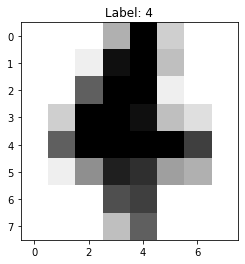

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


np.random.seed(42)
data, target = load_digits(return_X_y=True)

idx = 250
plt.imshow(data[idx].reshape(8, 8), cmap='gray_r')
plt.title(f'Label: {target[idx]}')
plt.show()

In [ ]:
print(target[idx])

4


### 84 load_digit + train_test_split

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

np.random.seed(42)
data, target = load_digits(return_X_y=True)

from sklearn.preprocessing import StandardScaler

ss = StandardScaler() 
ss.fit_transform(data)

from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data, target, random_state = 42)

print('X_train shape:', data_train.shape)
print('y_train shape:', target_train.shape)
print('X_test shape:', data_test.shape)
print('y_test shape:', target_test.shape)

X_train shape: (1347, 64)
y_train shape: (1347,)
X_test shape: (450, 64)
y_test shape: (450,)


### 85 load_digit + KNN

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)
data, target = load_digits(return_X_y=True)
data = data / data.max()

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

print('KNN accuracy:',round(knn.score(X_test, y_test),4))


KNN accuracy: 0.9933


### 86 load_digit + LogisticRegression

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


np.random.seed(42)
data, target = load_digits(return_X_y=True)
data = data / data.max()

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

lr = LogisticRegression()

lr.fit(X_train, y_train)

print('Logistic Regression accuracy:', round(lr.score(X_test, y_test),4))

Logistic Regression accuracy: 0.9689


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
